#### Note to self, if it takes too long to run, then just don't run any of the parts that take too long, unless tweaks are applied to the data preprocessing part.

Preprocessing.

### Import Libraries

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

from xgboost import XGBClassifier

## Part A - Model Variety Training

### Import Dataframe

In [15]:
# Load the dataset from a Folder called Datasets, plaed inside C drive.
df_raw = pd.read_csv("C:\Datasets\Crime_Data_from_2020_to_Present.csv", low_memory="False")
df_raw

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_1496\1256870994.py:2: SyntaxWarning: invalid escape sequence '\D'
  df_raw = pd.read_csv("C:\Datasets\Crime_Data_from_2020_to_Present.csv", low_memory="False")


,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,4/11/2021 0:00,11/7/2020 0:00,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/3/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,IC,Invest Cont,237.0,NaN,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,IC,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233


In [16]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0                   1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

### View Unique values for Crimes

In [17]:
unique_desc = df_raw["Crm Cd Desc"].dropna().unique()
len(unique_desc), unique_desc

(140,
 array(['THEFT OF IDENTITY',
        'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
        'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
        'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
        'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
        'VEHICLE - STOLEN', 'BURGLARY', 'BURGLARY FROM VEHICLE',
        'THEFT PLAIN - PETTY ($950 & UNDER)',
        'INTIMATE PARTNER - SIMPLE ASSAULT', 'BATTERY - SIMPLE ASSAULT',
        'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
        'VEHICLE - ATTEMPT STOLEN',
        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
        'ROBBERY', 'FIREARMS RESTRAINING ORDER (FIREARMS RO)',
        'BIKE - STOLEN', 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
        'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
        'CRIMINAL THREATS - NO WEAPON DISPLAYED',
        'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
        'BATTERY WITH SEXUAL CONTACT',
        'LETTERS, LEWD  -  TELEPHONE

## DataPrep

### Map each Crime commited to a matching Criminal Offense

In [18]:
# Keyword-based mapping rules for auto‐labeling
mapping_rules = {
    "Violent Crime": [
        "ASSAULT", "BATTERY", "HOMICIDE", "MANSLAUGHTER", "RAPE",
        "SEXUAL", "SODOMY", "ORAL COPULATION", "KIDNAPPING",
        "LYNCHING", "STALKING", "THREATS", "INTIMATE PARTNER"
    ],
    "Property Crime": [
        "THEFT", "BURGLARY", "VANDALISM", "ARSON", "SHOPLIFTING",
        "BIKE - STOLEN", "COIN MACHINE"
    ],
    "Vehicle Crime": [
        "VEHICLE", "DRIVING WITHOUT OWNER CONSENT", "DWOC"
    ],
    "Fraud / Financial Crime": [
        "FRAUD", "EMBEZZLEMENT", "COUNTERFEIT", "BUNCO",
        "CREDIT CARD", "DOCUMENT WORTHLESS", "INSURANCE"
    ],
    "Weapons / Public Safety": [
        "FIREARM", "WEAPON", "SHOTS FIRED", "BOMB", "BRANDISH"
    ],
    "Sex Crime": [
        "LEWD", "INDECENT EXPOSURE", "CHILD PORNOGRAPHY",
        "PANDERING", "PIMPING", "HUMAN TRAFFICKING"
    ],
    "Child-Related Crime": [
        "CHILD", "CONTRIBUTING", "CHILD NEGLECT"
    ],
    "Court / Restraining Order / Legal": [
        "COURT", "RESTRAINING", "CONTEMPT", "FAILURE TO APPEAR",
        "VIOLATION"
    ],
    "Public Disturbance / Disorder": [
        "DISTURBANCE", "PEACE", "TRESPASS", "DISRUPT",
        "RIOT", "DISOBEY"
    ],
    "Other Crime": []  # fallback
}

# Function to classify crimes
def classify(description: str):
    if not isinstance(description, str):
        return "Other Crime"
    desc = description.upper()
    for category, keywords in mapping_rules.items():
        for kw in keywords:
            if kw in desc:
                return category
    return "Other Crime"

# Create new class column
df_raw["Crime_Class"] = df_raw["Crm Cd Desc"].apply(classify)

# Save a preview
preview = df_raw[["Crm Cd Desc", "Crime_Class"]].head(30)
preview

,Crm Cd Desc,Crime_Class
0,THEFT OF IDENTITY,Property Crime
1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",Violent Crime
2,THEFT OF IDENTITY,Property Crime
3,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,Property Crime
4,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),Property Crime
5,THEFT OF IDENTITY,Property Crime
6,THEFT OF IDENTITY,Property Crime
7,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,Other Crime
8,THEFT OF IDENTITY,Property Crime
9,THEFT OF IDENTITY,Property Crime


In [19]:
df_raw['Crime_Class'].value_counts().reset_index(name='Count')

,Crime_Class,Count
0,Property Crime,508444
1,Violent Crime,233487
2,Vehicle Crime,123445
3,Other Crime,63036
4,Court / Restraining Order / Legal,21771
5,Public Disturbance / Disorder,19977
6,Weapons / Public Safety,19431
7,Sex Crime,11870
8,Child-Related Crime,2784
9,Fraud / Financial Crime,746


Let's start with RAW, unprocesseed model training, then work our way up.

## Category: Machine Learning Models.

### Tree Based: Decision Tree (RAW)

In [ ]:
# Remove Crm Cd Desc to avoid leakage
df_model = df_raw.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model["Crime_Class"])

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
dt_model_1 = DecisionTreeClassifier()
dt_model_1.fit(X_train, y_train)

# Predict
y_pred_test_1 = dt_model_1.predict(X_test)
y_pred_train_1 = dt_model_1.predict(X_train)

# Evaluation
report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test_1, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test, y_pred_test_1)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")


Training Set Accuracy: 0.9998877032180846
Testing Set Accuracy: 0.8043071595831481
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.999868  0.999983  0.999926  356035.000000
1              0.999982  0.999994  0.999988  163391.000000
2              0.999525  0.999729  0.999627   44202.000000
3              0.999907  0.999317  0.999612   86340.000000
4              1.000000  0.999926  0.999963   13595.000000
5              1.000000  1.000000  1.000000    8282.000000
6              1.000000  1.000000  1.000000   15207.000000
7              1.000000  1.000000  1.000000   13944.000000
8              1.000000  1.000000  1.000000     540.000000
9              1.000000  1.000000  1.000000    1957.000000
accuracy       0.999888  0.999888  0.999888       0.999888
macro avg      0.99

### Tree Based: Random Forest (RAW)

*Without any parameters, this thing will take a while...

In [8]:
print("=== Random Forest Crime Classification ===")

# Remove Crm Cd Desc to avoid leakage
df_model = df_raw.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, class_names = pd.factorize(df_model["Crime_Class"])

# Convert datetime columns to int timestamps
for col in X.select_dtypes(include=['datetime', 'datetimetz']).columns:
    X[col] = X[col].view('int64')

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split (stratify for class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize Random Forest with balanced, regularized params
rf_model_1 = RandomForestClassifier()
# Save paraneter tunning for PART B. 

rf_model_1.fit(X_train, y_train)

# Predictions
y_pred_test_1 = rf_model_1.predict(X_test)
y_pred_train_1 = rf_model_1.predict(X_train)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test, y_pred_test_1)

print("\n=== Performance ===")
print(f"Training Set Accuracy: {train_accuracy}")
print(f"Testing Set Accuracy:  {test_accuracy}")
print(f"Overfit Gap:          {train_accuracy - test_accuracy:.4f}")

# Evaluation reports
report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test_1, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

=== Random Forest Crime Classification ===

=== Performance ===
Training Set Accuracy: 0.99987775287032
Testing Set Accuracy:  0.8595944251703163
Overfit Gap:          0.1403
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.999935  0.999888  0.999911  355910.000000
1              0.999957  0.999982  0.999969  163441.000000
2              0.999887  0.999320  0.999603   44125.000000
3              0.999410  0.999873  0.999641   86411.000000
4              1.000000  0.999926  0.999963   13602.000000
5              1.000000  0.999880  0.999940    8309.000000
6              1.000000  1.000000  1.000000   15240.000000
7              1.000000  1.000000  1.000000   13984.000000
8              1.000000  1.000000  1.000000     522.000000
9              1.000000  1.000000  1.000000  

### Linear/Probability Based: Gaussian Naive Bayes (RAW)

In [9]:
# Remove leakage columns
df_model = df_raw.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model["Crime_Class"])

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values (LogReg cannot take NaN)
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a Gaussian NB Classifier
nb_model = GaussianNB()

# Train model
nb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_train_1 = nb_model.predict(X_train_scaled)
y_pred_test_1 = nb_model.predict(X_test_scaled)

# Evaluation
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test_1, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train_1)
test_accuracy = accuracy_score(y_test, y_pred_test_1)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Training Set Accuracy: 0.4662988828602417
Testing Set Accuracy: 0.46558186123954387
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.890902  0.555167  0.684061  356035.000000
1              0.517068  0.152224  0.235204  163391.000000
2              0.215135  0.137573  0.167826   44202.000000
3              0.766465  0.944881  0.846373   86340.000000
4              0.183665  0.401103  0.251958   13595.000000
5              0.027011  0.253803  0.048826    8282.000000
6              0.131554  0.325048  0.187302   15207.000000
7              0.268946  0.299053  0.283201   13944.000000
8              0.004153  0.851852  0.008266     540.000000
9              0.026096  0.366377  0.048721    1957.000000
accuracy       0.466299  0.466299  0.466299       0.466299
macro avg      0.3

### Gradient: XGBoost (RAW)

In [10]:
# Remove leakage columns
df_model = df_raw.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model["Crime_Class"])

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train XGBoost model
xgb_model_1 = XGBClassifier()
#    n_estimators=300,
#    learning_rate=0.1,
#    max_depth=6,
#    subsample=0.8,
#    colsample_bytree=0.8,
#    eval_metric="mlogloss",
#    random_state=42
# )

xgb_model_1.fit(X_train, y_train)

# Predictions
y_pred_train = xgb_model_1.predict(X_train)
y_pred_test = xgb_model_1.predict(X_test)

# Evaluation reports
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")


Training Set Accuracy: 0.8717869260959242
Testing Set Accuracy: 0.8623440288161115
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.917569  0.922783  0.920169  356035.000000
1              0.851506  0.959478  0.902273  163391.000000
2              0.701687  0.426248  0.530337   44202.000000
3              0.824993  0.947892  0.882183   86340.000000
4              0.770262  0.443913  0.563229   13595.000000
5              0.755943  0.303308  0.432917    8282.000000
6              0.756248  0.668574  0.709713   15207.000000
7              0.818212  0.523236  0.638292   13944.000000
8              1.000000  0.048148  0.091873     540.000000
9              0.732060  0.646398  0.686567    1957.000000
accuracy       0.871787  0.871787  0.871787       0.871787
macro avg      0.81

## Category: Deep Learning Models

### Neural Networks: CNN

In [55]:
# Remove leakage columns
df_model = df_raw.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model["Crime_Class"])

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ====== RESHAPE FOR CNN (Conv1D needs shape: samples, timesteps, features) ======
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ====== BUILD CNN MODEL ======
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ====== TRAIN ======
history = model.fit(
    X_train_cnn, y_train_cat,
    epochs=10,              # Use epoch size = 10, since the datset is fairly large. Fewer epochs means less strain and timne
    batch_size=32,          #Default values is 32.
    validation_split=0.2,   #Keras default is 0.0
    verbose=1               #Keras default is 1
)

# ====== PREDICT ======
y_pred_train = model.predict(X_train_cnn).argmax(axis=1)
y_pred_test = model.predict(X_test_cnn).argmax(axis=1)

# ====== EVALUATION ======
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Epoch 1/10


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17588/17588 ━━━━━━━━━━━━━━━━━━━━ 108s 6ms/step - accuracy: 0.8195 - loss: 0.5573 - val_accuracy: 0.8307 - val_loss: 0.5108
Epoch 2/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 89s 5ms/step - accuracy: 0.8284 - loss: 0.5154 - val_accuracy: 0.8336 - val_loss: 0.4956
Epoch 3/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 99s 6ms/step - accuracy: 0.8304 - loss: 0.5062 - val_accuracy: 0.8343 - val_loss: 0.4922
Epoch 4/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 96s 5ms/step - accuracy: 0.8322 - loss: 0.5006 - val_accuracy: 0.8348 - val_loss: 0.4907
Epoch 5/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 107s 6ms/step - accuracy: 0.8328 - loss: 0.4969 - val_accuracy: 0.8367 - val_loss: 0.4868
Epoch 6/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 106s 6ms/step - accuracy: 0.8340 - loss: 0.4946 - val_accuracy: 0.8364 - val_loss: 0.4856
Epoch 7/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 108s 6ms/step - accuracy: 0.8346 - loss: 0.4928 - val_accuracy: 0.8369 - val_loss: 0.4840
Epoch 8/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 102s 6ms/step - accuracy: 0.8346

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

Training Set Accuracy: 0.8380126028261831
Testing Set Accuracy: 0.8362907879985937
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.882703  0.914329  0.898238  356035.000000
1              0.802577  0.964447  0.876098  163391.000000
2              0.636438  0.245464  0.354286   44202.000000
3              0.821626  0.945888  0.879389   86340.000000
4              0.765112  0.195513  0.311442   13595.000000
5              0.494340  0.031635  0.059464    8282.000000
6              0.547890  0.402117  0.463820   15207.000000
7              0.744446  0.295611  0.423182   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.617039  0.381196  0.471257    1957.000000
accuracy       0.838013  0.838013  0.838013       0.838013
macro avg      0.63

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

### Neural Network: ANN

In [7]:
# Remove leakage columns
df_model = df_raw.drop(columns=[
    "Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc",
    "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"
])

# Prepare training data
X = df_model.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model["Crime_Class"])

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ====== BUILD ANN MODEL ======
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),

    Dense(num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ====== TRAIN ======
history = model.fit(
    X_train_scaled, y_train_cat,
    epochs=10,              #Use 10 as a derfault value for epochs
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ====== PREDICT ======
y_pred_train = model.predict(X_train_scaled).argmax(axis=1)
y_pred_test = model.predict(X_test_scaled).argmax(axis=1)

# ====== EVALUATION ======
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.8114 - loss: 0.5778 - val_accuracy: 0.8288 - val_loss: 0.5160
Epoch 2/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.8234 - loss: 0.5319 - val_accuracy: 0.8312 - val_loss: 0.5036
Epoch 3/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.8256 - loss: 0.5241 - val_accuracy: 0.8326 - val_loss: 0.5040
Epoch 4/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.8267 - loss: 0.5202 - val_accuracy: 0.8333 - val_loss: 0.4992
Epoch 5/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - accuracy: 0.8272 - loss: 0.5174 - val_accuracy: 0.8335 - val_loss: 0.4967
Epoch 6/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 53s 3ms/step - accuracy: 0.8281 - loss: 0.5152 - val_accuracy: 0.8336 - val_loss: 0.4970
Epoch 7/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.8285 - loss: 0.5138 - val_accuracy: 0.8337 - val_loss: 0.4955
Epoch 8/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - accuracy: 

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

Training Set Accuracy: 0.8357865678834047
Testing Set Accuracy: 0.8350304147954547
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.882631  0.911174  0.896675  356035.000000
1              0.803602  0.958725  0.874336  163391.000000
2              0.597332  0.265395  0.367507   44202.000000
3              0.821615  0.945819  0.879353   86340.000000
4              0.672763  0.227289  0.339784   13595.000000
5              0.000000  0.000000  0.000000    8282.000000
6              0.549317  0.399553  0.462616   15207.000000
7              0.747830  0.265634  0.392020   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.473761  0.332141  0.390508    1957.000000
accuracy       0.835787  0.835787  0.835787       0.835787
macro avg      0.55

Can be improved? Time to find out.

## Part A - Feature Engineering and Transformation

### Data Cleaning

Check for Duplicates

In [20]:
df_new = df_raw.drop_duplicates()
df_new

,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Crime_Class
0,211507896,4/11/2021 0:00,11/7/2020 0:00,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime
2,240913563,12/10/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime
4,201418201,10/3/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946.0,NaN,NaN,NaN,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,Invest Cont,237.0,NaN,NaN,NaN,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,850,INDECENT EXPOSURE,...,Invest Cont,850.0,NaN,NaN,NaN,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime


None found.

### Removing Columns 
Do not proceed without caution. In this context, the chosen columns were dropped due to them having a direct relationship to the target class, which may cause a leakage.

In [21]:
df_new = df_new.drop(columns=["Crm Cd Desc", "Crm Cd", "Premis Cd", "Premis Desc", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4"])
df_new

,,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,...,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class
0,211507896,4/11/2021 0:00,11/7/2020 0:00,845,15,N Hollywood,1502,2,377,31,...,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,...,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime
2,240913563,12/10/2024 0:00,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,377,30,...,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,344,47,...,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime
4,201418201,10/3/2020 0:00,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,1300 0344 1606 2032,63,...,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,2/2/2025 0:00,130,21,Topanga,2103,2,NaN,35,...,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime
1004987,250404100,02/18/2025 12:00:00 AM,02/18/2025 12:00:00 AM,1000,4,Hollenbeck,479,2,1258 0553 0602,11,...,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime
1004988,251304095,01/31/2025 12:00:00 AM,01/30/2025 12:00:00 AM,1554,13,Newton,1372,2,NaN,16,...,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime
1004989,251704066,01/17/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1600,17,Devonshire,1774,2,0400 1259 1822 0356,17,...,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime


### Standardization

In this phase, TAKE NOTE that anything, once you hit run, results in the dataframe being permanently changed. So to rerun this segment, you MUST reload and reimport the DataFrame again.

In [22]:
# 1. Clean DATE OCC (mixed formats)
df_new['DATE OCC'] = pd.to_datetime(df_new['DATE OCC'], format='mixed', errors='coerce')

# 2. Clean TIME OCC (force numeric → Int64 → 4-digit HHMM)
df_new['TIME OCC'] = pd.to_numeric(df_new['TIME OCC'], errors='coerce').astype('Int64')
time_str = df_new['TIME OCC'].astype(str).str.zfill(4)

# 3. Combine DATE OCC + TIME OCC into a single datetime
df_new['DateTime OCC'] = pd.to_datetime(
    df_new['DATE OCC'].dt.strftime('%Y-%m-%d') + ' ' + time_str,
    errors='coerce'
)

# 4. Drop the original columns used for merging
df_new = df_new.drop(columns=['DATE OCC', 'TIME OCC'])

df_new

,,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class,DateTime OCC
0,211507896,4/11/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime,2020-11-07 08:45:00
1,201516622,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime,2020-10-18 18:45:00
2,240913563,12/10/2024 0:00,9,Van Nuys,933,2,377,30,M,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime,2020-10-30 12:40:00
3,210704711,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime,2020-12-24 13:10:00
4,201418201,10/3/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime,2020-09-29 18:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,252104112,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime,2025-02-02 01:30:00
1004987,250404100,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime,2025-02-18 10:00:00
1004988,251304095,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime,2025-01-30 15:54:00
1004989,251704066,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime,2025-01-17 16:00:00


### Check for NULL values

In [23]:
df_new.isna().sum()

                       0
Date Rptd              0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Mocodes           151619
Vict Age               0
Vict Sex          144644
Vict Descent      144656
Weapon Used Cd    677744
Weapon Desc       677744
Status                 1
Status Desc            0
LOCATION               0
Cross Street      850755
LAT                    0
LON                    0
Crime_Class            0
DateTime OCC           0
dtype: int64

Leave as NULL, since some records do in fact not possess the given info.

In [24]:
df_new = df_new.drop(columns=[' '])
df_new

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class,DateTime OCC
0,4/11/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,NaN,NaN,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime,2020-11-07 08:45:00
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,200.0,KNIFE WITH BLADE 6INCHES OR LESS,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime,2020-10-18 18:45:00
2,12/10/2024 0:00,9,Van Nuys,933,2,377,30,M,W,NaN,NaN,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime,2020-10-30 12:40:00
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,NaN,NaN,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime,2020-12-24 13:10:00
4,10/3/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,NaN,NaN,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime,2020-09-29 18:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,NaN,NaN,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime,2025-02-02 01:30:00
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,NaN,NaN,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime,2025-02-18 10:00:00
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,NaN,NaN,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime,2025-01-30 15:54:00
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime,2025-01-17 16:00:00


Remove the Weapon Used Cd column, and change the Weapon Desc column to binary.

In [25]:
# 1. Drop the Weapon Used Cd column (if it exists)
df_new = df_new.drop(columns=['Weapon Used Cd'], errors='ignore')

# 2. Create a binary Weapon_Present column
df_new['Weapon_Present'] = df_new['Weapon Desc'].apply(
    lambda x: 'Present' if pd.notna(x) and str(x).strip() != '' else 'Absent'
)

# 3. (Optional) Drop Weapon Desc if you want to fully remove the text info
df_new = df_new.drop(columns=['Weapon Desc'], errors='ignore')

df_new

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Mocodes,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Crime_Class,DateTime OCC,Weapon_Present
0,4/11/2021 0:00,15,N Hollywood,1502,2,377,31,M,H,IC,Invest Cont,7800 BEEMAN AV,NaN,34.2124,-118.4092,Property Crime,2020-11-07 08:45:00,Absent
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,IC,Invest Cont,ATOLL AV,N GAULT,34.1993,-118.4203,Violent Crime,2020-10-18 18:45:00,Present
2,12/10/2024 0:00,9,Van Nuys,933,2,377,30,M,W,IC,Invest Cont,14600 SYLVAN ST,NaN,34.1847,-118.4509,Property Crime,2020-10-30 12:40:00,Absent
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,344,47,F,A,IC,Invest Cont,6000 COMEY AV,NaN,34.0339,-118.3747,Property Crime,2020-12-24 13:10:00,Absent
4,10/3/2020 0:00,14,Pacific,1454,1,1300 0344 1606 2032,63,M,H,IC,Invest Cont,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Property Crime,2020-09-29 18:30:00,Absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,NaN,35,M,X,IC,Invest Cont,22100 ROSCOE BL,NaN,34.2259,-118.6126,Other Crime,2025-02-02 01:30:00,Absent
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,1258 0553 0602,11,M,B,IC,Invest Cont,3500 PERCY ST,NaN,34.0277,-118.1979,Child-Related Crime,2025-02-18 10:00:00,Absent
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,NaN,16,F,H,IC,Invest Cont,300 E 53RD ST,NaN,33.9942,-118.2701,Sex Crime,2025-01-30 15:54:00,Absent
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,0400 1259 1822 0356,17,M,H,IC,Invest Cont,9600 ZELZAH AV,NaN,34.2450,-118.5233,Violent Crime,2025-01-17 16:00:00,Present


### Dropping columns that provide meaningless value:

Start with obvious ones, Location of the crime will often be unique among all records, but the area/district may not. So it can be dropped.

To do so, apply a test such as Pearson Correlation

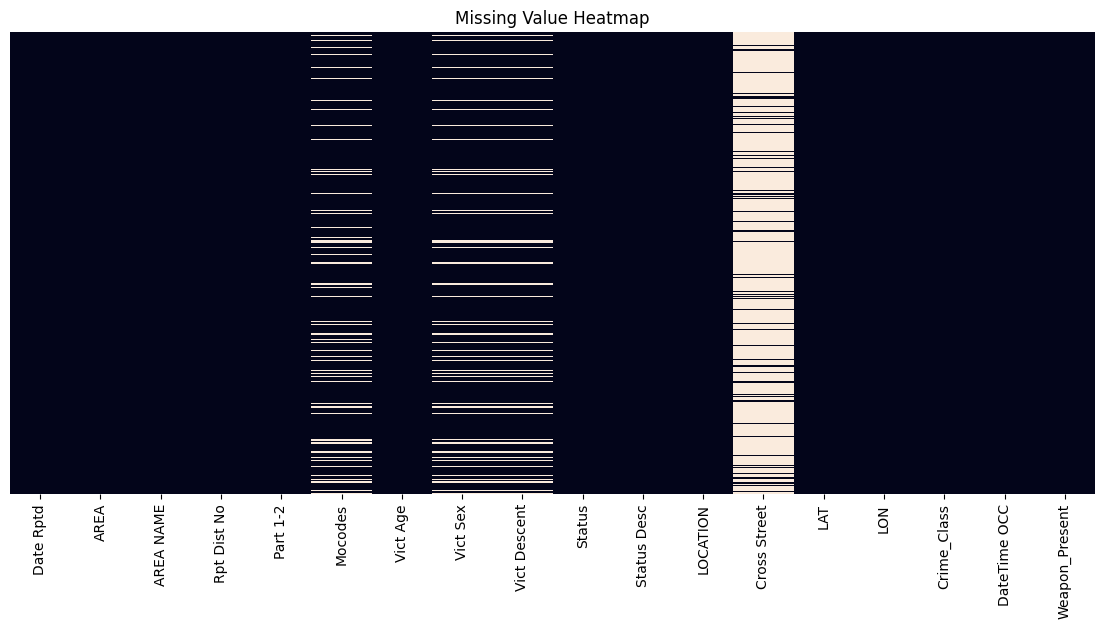

In [26]:
plt.figure(figsize=(14, 6))
sns.heatmap(df_new.isna(), cbar=False, yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()

Cross Street possess a lot of missing values. This can be dropped completely if Location is already sufficient info.

As for Mo Codes, this is neglectable, since some records may only be a minor offense. So no MO Code may have been recorded.

This applies to victim sex and descent as well, since not all crimes have a victim involved, such as vandalisme.

### Test Pearson Correlation (Numeric Features)


Top 25 strongest Pearson correlations (absolute):
      Feature 1            Feature 2  Correlation
0          AREA          Rpt Dist No     0.999051
18          LAT                  LON    -0.998190
11     Part 1-2             Vict Age     0.206183
17     Vict Age  Crime_Class_numeric    -0.081723
14     Part 1-2  Crime_Class_numeric     0.071209
13     Part 1-2                  LON     0.029212
12     Part 1-2                  LAT    -0.028722
3          AREA                  LAT     0.025338
8   Rpt Dist No                  LAT     0.025077
7   Rpt Dist No             Vict Age     0.022624
2          AREA             Vict Age     0.022593
4          AREA                  LON    -0.010541
9   Rpt Dist No                  LON    -0.010469
1          AREA             Part 1-2     0.007675
6   Rpt Dist No             Part 1-2     0.007489
10  Rpt Dist No  Crime_Class_numeric    -0.003770
5          AREA  Crime_Class_numeric    -0.003678
16     Vict Age                  LON     0.002219


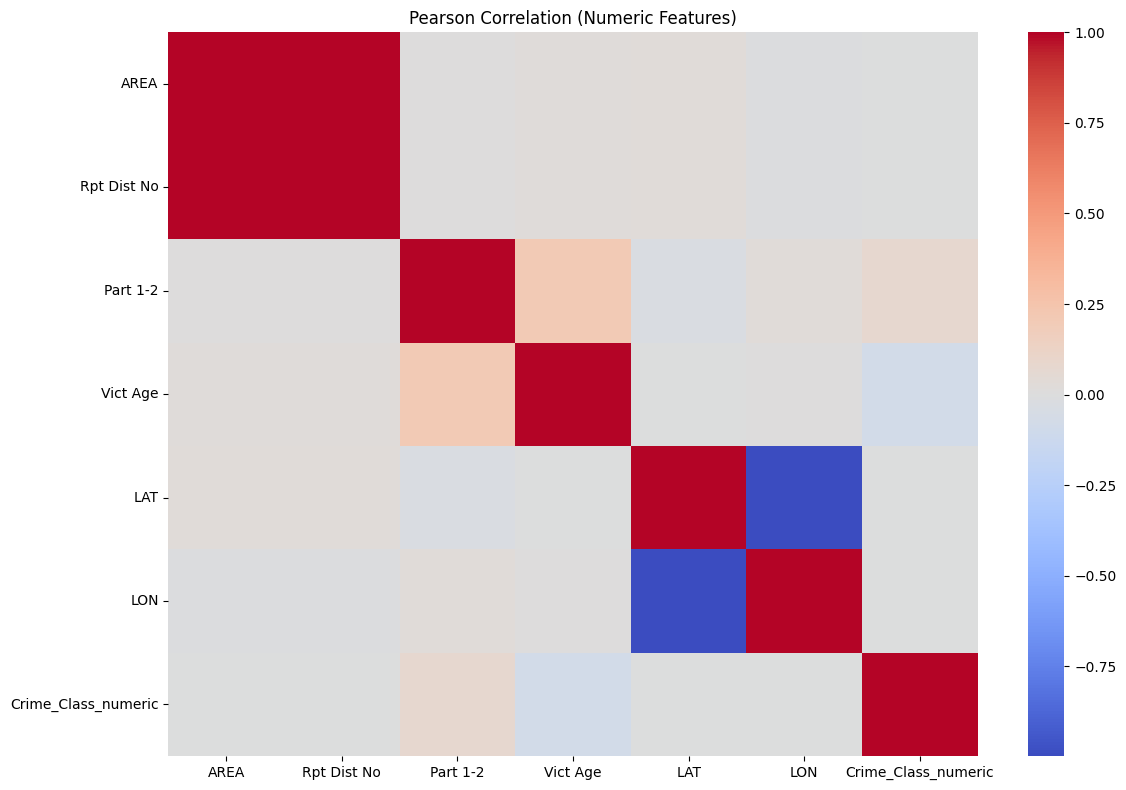

In [27]:
# Choose the DataFrame to analyze; use the most recent processed one if available
try:
    df_corr_source = df_new.copy()
except NameError:
    df_corr_source = df_raw.copy()

# Ensure target encoding (optional): demonstrate correlation against encoded target when present
if 'Crime_Class' in df_corr_source.columns:
    df_corr_source['Crime_Class_numeric'] = df_corr_source['Crime_Class'].astype('category').cat.codes

# Select only numeric columns
num_df = df_corr_source.select_dtypes(include=['number'])

# Pearson correlation matrix
corr = num_df.corr(numeric_only=True)

# Upper triangle flatten for pairwise sorted report
upper = corr.where(~np.tril(np.ones(corr.shape)).astype(bool))
corr_report = (
    upper.stack()
          .reset_index()
          .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
)

# Sort by absolute correlation strength
corr_report = corr_report.iloc[corr_report['Correlation'].abs().sort_values(ascending=False).index]

# Show top pairs
print("Top 25 strongest Pearson correlations (absolute):")
print(corr_report.head(25))

# Optional: heatmap for a quick visual
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Pearson Correlation (Numeric Features)')
plt.tight_layout()
plt.show()

### What can be derived freom this correlation table?

1. Area and Rpt Dist No are inheritelly the same info, if you know the area where the crime occured, is the specific District Number really required?
2. Many features have a correlation near 0, this implies that many features are highly independent. In  which, leave them be.
3. Latitude and Longitude do provide the coordinates of the crime, but neither predicts each other.


In [28]:
# Make a copy of the data
df_corr = df_new.copy()

# Convert Crime_Class (categorical) → numeric labels
df_corr['Crime_Class_numeric'] = df_corr['Crime_Class'].astype('category').cat.codes

# Select only numeric columns
num_df = df_corr.select_dtypes(include=['number'])

# Compute correlation with the numeric-encoded target
target_corr = num_df.corr(numeric_only=True)['Crime_Class_numeric']

# Remove the target itself
target_corr = target_corr.drop(labels=['Crime_Class_numeric'])

# Turn into sorted dataframe
target_corr_report = (
    target_corr
        .abs()
        .sort_values(ascending=False)
        .rename("Correlation_with_Crime_Class")
        .to_frame()
)

target_corr_report.head(20)


,Correlation_with_Crime_Class
Vict Age,0.081723
Part 1-2,0.071209
Rpt Dist No,0.003770
AREA,0.003678
LAT,0.001563
LON,0.001106


In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Date Rptd       1004991 non-null  object        
 1   AREA            1004991 non-null  int64         
 2   AREA NAME       1004991 non-null  object        
 3   Rpt Dist No     1004991 non-null  int64         
 4   Part 1-2        1004991 non-null  int64         
 5   Mocodes         853372 non-null   object        
 6   Vict Age        1004991 non-null  int64         
 7   Vict Sex        860347 non-null   object        
 8   Vict Descent    860335 non-null   object        
 9   Status          1004990 non-null  object        
 10  Status Desc     1004991 non-null  object        
 11  LOCATION        1004991 non-null  object        
 12  Cross Street    154236 non-null   object        
 13  LAT             1004991 non-null  float64       
 14  LON             10

### Let's tackle Mocodes first, these represent a given crime/offense commited. You can find the full list in the file attached.

In [30]:
# --- Step 1: Clean & explode the MO Codes column ---
# Convert NaN to empty string
df_new['Mocodes'] = df_new['Mocodes'].fillna('')

# Split by spaces → expand into list
df_new['MOCODES_LIST'] = df_new['Mocodes'].str.strip().str.split()

# Explode (each code becomes a row)
exploded = df_new.explode('MOCODES_LIST')

Then, extract all unique MO code entries present.

In [31]:
all_codes = sorted({code for sublist in df_new['MOCODES_LIST'] for code in sublist})
print(len(all_codes), "unique MO codes found")

938 unique MO codes found


Count the frequency of each MO Code in the dataset

In [32]:
# --- Step 2: Count MO code frequencies ---
mo_counts = (
    exploded['MOCODES_LIST']
    .value_counts()
)

Select the top 100 MO Codes to keep

In [33]:
# --- Step 3: Select the Top 100 codes ---
top_100 = set(mo_counts.head(100).index)

Filter MO list into top codes and “others”

In [34]:
# --- Step 4: Create one-hot columns for each top code ---
for code in top_100:
    df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)

# --- Step 5: Create the OTHERS column ---
# OTHERS = true if the row contains any MO code NOT in the top 100
df_new['MO_OTHERS'] = df_new['MOCODES_LIST'].apply(
    lambda lst: any(code not in top_100 for code in lst)
)

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_1496\2391797412.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)
C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_1496\2391797412.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new[f"MO_{code}"] = df_new['MOCODES_LIST'].apply(lambda lst: code in lst)
C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_1496\2391797412.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usual

Filter each crime’s MO list to only keep top 100 codes, create an Others column to store everything else.

Multi-hot encode only the top 100 codes

In [35]:
# --- Step 6: Convert booleans to integers (0/1) ---
mo_cols = [col for col in df_new.columns if col.startswith("MO_")]
df_new[mo_cols] = df_new[mo_cols].astype(int)

# --- Step 7: Clean up temporary column ---
df_new_1 = df_new.drop(columns=["MOCODES_LIST"])

# --- Done ---
print(f"Created {len(mo_cols)} MO Code features (100 Top + OTHERS).")
print(mo_cols[:10])

Created 101 MO Code features (100 Top + OTHERS).
['MO_0325', 'MO_1212', 'MO_0319', 'MO_0445', 'MO_1817', 'MO_2032', 'MO_0104', 'MO_1609', 'MO_0910', 'MO_344']


In [36]:
df_new_1 = df_new_1.drop(columns=['Mocodes'], errors='ignore')
df_new_1

,Date Rptd,AREA,AREA NAME,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,...,MO_1607,MO_2002,MO_0360,MO_0446,MO_0906,MO_0701,MO_0522,MO_0361,MO_1302,MO_OTHERS
0,4/11/2021 0:00,15,N Hollywood,1502,2,31,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
1,10/21/2020 12:00:00 AM,15,N Hollywood,1521,1,32,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
2,12/10/2024 0:00,9,Van Nuys,933,2,30,M,W,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
3,12/24/2020 12:00:00 AM,7,Wilshire,782,1,47,F,A,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
4,10/3/2020 0:00,14,Pacific,1454,1,63,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2/2/2025 0:00,21,Topanga,2103,2,35,M,X,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1004987,02/18/2025 12:00:00 AM,4,Hollenbeck,479,2,11,M,B,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,1
1004988,01/31/2025 12:00:00 AM,13,Newton,1372,2,16,F,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0
1004989,01/17/2025 12:00:00 AM,17,Devonshire,1774,2,17,M,H,IC,Invest Cont,...,0,0,0,0,0,0,0,0,0,0


### Next, tackle the location based columns

As mentioned, since all crimes will more times than not, occur in unique, varying locations, it is best to assume that there is no association or pattern to be determined from them. They are simply too specific to be trained upon.

Another key feature that could be dropped is the Date of te Report. Since each report will have its own unique entry date, hence it is safe to assume that the column is noisy and unfeasible in model training.

In [37]:
df_new_1 = df_new_1.drop(columns=['LOCATION', 'Cross Street', 'DateTime OCC', 'Date Rptd'], errors='ignore') #Remove the dates
df_new_1

,AREA,AREA NAME,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,...,MO_1607,MO_2002,MO_0360,MO_0446,MO_0906,MO_0701,MO_0522,MO_0361,MO_1302,MO_OTHERS
0,15,N Hollywood,1502,2,31,M,H,IC,Invest Cont,34.2124,...,0,0,0,0,0,0,0,0,0,1
1,15,N Hollywood,1521,1,32,M,H,IC,Invest Cont,34.1993,...,0,0,0,0,0,0,0,0,0,0
2,9,Van Nuys,933,2,30,M,W,IC,Invest Cont,34.1847,...,0,0,0,0,0,0,0,0,0,1
3,7,Wilshire,782,1,47,F,A,IC,Invest Cont,34.0339,...,0,0,0,0,0,0,0,0,0,0
4,14,Pacific,1454,1,63,M,H,IC,Invest Cont,33.9813,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,21,Topanga,2103,2,35,M,X,IC,Invest Cont,34.2259,...,0,0,0,0,0,0,0,0,0,0
1004987,4,Hollenbeck,479,2,11,M,B,IC,Invest Cont,34.0277,...,0,0,0,0,0,0,0,0,0,1
1004988,13,Newton,1372,2,16,F,H,IC,Invest Cont,33.9942,...,0,0,0,0,0,0,0,0,0,0
1004989,17,Devonshire,1774,2,17,M,H,IC,Invest Cont,34.2450,...,0,0,0,0,0,0,0,0,0,0


### Next, we need to choose bewteen keeping AREA, or DISTRICT.

AREA:
- It encodes neighborhood-level crime patterns
- It’s stable and interpretable

Rpt District:
- This is a finer-grained region ID.
- Usually LAPD districts are ~1–2 square miles.

But using both AREA and Rpt Dist No creates strong multicollinearity, because:
- AREA is a parent region
- Rpt Dist No is the subregion

Which is Better?

Refer back to the correlation test, Rpt District is SLIGHTLY better than AREA, so that is what we will keep. It may contain more info than AREA, as AREA is a bit too general.

In [38]:
df_new_1 = df_new_1.drop(columns=['AREA'])

In [39]:
df_new_1 = df_new_1.drop(columns=['AREA NAME'])
df_new_1

,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,Crime_Class,...,MO_1607,MO_2002,MO_0360,MO_0446,MO_0906,MO_0701,MO_0522,MO_0361,MO_1302,MO_OTHERS
0,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,Property Crime,...,0,0,0,0,0,0,0,0,0,1
1,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,Violent Crime,...,0,0,0,0,0,0,0,0,0,0
2,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,Property Crime,...,0,0,0,0,0,0,0,0,0,1
3,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,Property Crime,...,0,0,0,0,0,0,0,0,0,0
4,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,Property Crime,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,Other Crime,...,0,0,0,0,0,0,0,0,0,0
1004987,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,Child-Related Crime,...,0,0,0,0,0,0,0,0,0,1
1004988,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,Sex Crime,...,0,0,0,0,0,0,0,0,0,0
1004989,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,Violent Crime,...,0,0,0,0,0,0,0,0,0,0


### Finally, we need to decide what to do with LAT and LON

These are very powerful IF transformed.

Raw lat/lon are NOT useful directly because:
- models cannot interpret earth geometry
- correlation is near zero
- linear models especially fail with raw coordinates

Raw latitude and longitude values:
- have no linear meaning
- give almost zero Pearson correlation
- confuse tree models (too many splits)
- confuse linear models (not linear!)
- are extremely sensitive to tiny changes

But crimes happen in spatial hotspots:
- Downtown
- Hollywood
- South LA
- Venice
- San Fernando Valley
- Pico-Union
- Koreatown
- Westlake
- etc.

### Is there a way to make them useful via transformation?

### Clustering the LAT and LON into Bins of range values, may provide much more use.

In [40]:
from sklearn.cluster import KMeans

coords = df_new_1[['LAT', 'LON']].dropna()

kmeans = KMeans(n_clusters=100, random_state=42)

df_new_1['Location_Cluster'] = kmeans.fit_predict(coords)

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_1496\2141477543.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Location_Cluster'] = kmeans.fit_predict(coords)


### Method 1 — KMeans Clustering

This learns 50–200 “crime regions” directly from the data.

In [41]:
df_new_1

,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,Crime_Class,...,MO_2002,MO_0360,MO_0446,MO_0906,MO_0701,MO_0522,MO_0361,MO_1302,MO_OTHERS,Location_Cluster
0,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,Property Crime,...,0,0,0,0,0,0,0,0,1,71
1,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,Violent Crime,...,0,0,0,0,0,0,0,0,0,57
2,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,Property Crime,...,0,0,0,0,0,0,0,0,1,27
3,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,Property Crime,...,0,0,0,0,0,0,0,0,0,33
4,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,Property Crime,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,Other Crime,...,0,0,0,0,0,0,0,0,0,53
1004987,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,Child-Related Crime,...,0,0,0,0,0,0,0,0,1,93
1004988,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,Sex Crime,...,0,0,0,0,0,0,0,0,0,8
1004989,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,Violent Crime,...,0,0,0,0,0,0,0,0,0,44


### Method 2 — Spatial Binning (ranges)

This converts lat/lon into a grid.

In [42]:
df_new_1['Lat_bin'] = pd.cut(df_new_1['LAT'], bins=50, labels=False)
df_new_1['Lon_bin'] = pd.cut(df_new_1['LON'], bins=50, labels=False)


C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_1496\536423381.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Lat_bin'] = pd.cut(df_new_1['LAT'], bins=50, labels=False)
C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_1496\536423381.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new_1['Lon_bin'] = pd.cut(df_new_1['LON'], bins=50, labels=False)


In [43]:
df_new_1

,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,LAT,LON,Crime_Class,...,MO_0446,MO_0906,MO_0701,MO_0522,MO_0361,MO_1302,MO_OTHERS,Location_Cluster,Lat_bin,Lon_bin
0,1502,2,31,M,H,IC,Invest Cont,34.2124,-118.4092,Property Crime,...,0,0,0,0,0,0,1,71,49,0
1,1521,1,32,M,H,IC,Invest Cont,34.1993,-118.4203,Violent Crime,...,0,0,0,0,0,0,0,57,49,0
2,933,2,30,M,W,IC,Invest Cont,34.1847,-118.4509,Property Crime,...,0,0,0,0,0,0,1,27,49,0
3,782,1,47,F,A,IC,Invest Cont,34.0339,-118.3747,Property Crime,...,0,0,0,0,0,0,0,33,49,0
4,1454,1,63,M,H,IC,Invest Cont,33.9813,-118.4350,Property Crime,...,0,0,0,0,0,0,0,6,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004986,2103,2,35,M,X,IC,Invest Cont,34.2259,-118.6126,Other Crime,...,0,0,0,0,0,0,0,53,49,0
1004987,479,2,11,M,B,IC,Invest Cont,34.0277,-118.1979,Child-Related Crime,...,0,0,0,0,0,0,1,93,49,0
1004988,1372,2,16,F,H,IC,Invest Cont,33.9942,-118.2701,Sex Crime,...,0,0,0,0,0,0,0,8,49,0
1004989,1774,2,17,M,H,IC,Invest Cont,34.2450,-118.5233,Violent Crime,...,0,0,0,0,0,0,0,44,49,0


This creates 2 features:
- Lat_bin
- Lon_bin

Which together form a 2D grid, like “Region (12, 34)”.

This is good for:
- linear models
- tree models
- giant datasets
- preserving spatial structure

### 🟢 Combining Both Is Even Better

Crime prediction systems often use:

✔ Location_Cluster (KMeans)

✔ Lat_bin + Lon_bin (50x50 grid)

This gives:
- global structure (clusters)
- local structure (grid bins)
- Without storing raw LAT/LON.

## Part A - Remodelling with Processing

Now, let's try building the Models again.

### Tree-Based: Decision Tree (Processed)

In [31]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new_1.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# Convert datetime columns to int64 timestamps
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view('int64')

# Convert list columns to strings so they can be factorized
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train model
dt_model_3 = DecisionTreeClassifier()
dt_model_3.fit(X_train, y_train)

# Predict
y_pred = dt_model_3.predict(X_test)
y_pred_train = dt_model_3.predict(X_train)

# Evaluation
report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

Training Set Accuracy: 0.9819514906331691
Testing Set Accuracy: 0.8781550789723315
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.987960  0.976778  0.982337  356035.000000
1              0.999951  0.999988  0.999969  163391.000000
2              0.997842  0.994005  0.995920   44202.000000
3              0.908648  0.953081  0.930334   86340.000000
4              0.999779  0.999559  0.999669   13595.000000
5              0.999033  0.998310  0.998671    8282.000000
6              0.999605  0.999408  0.999507   15207.000000
7              0.995265  0.994908  0.995087   13944.000000
8              1.000000  0.981481  0.990654     540.000000
9              1.000000  0.999489  0.999744    1957.000000
accuracy       0.981951  0.981951  0.981951       0.981951
macro avg      0.98

A highly Noticeable increase.

Now, let's plot the Error vs Complexity curve.

------------------------
Decision Tree Log Loss
------------------------
Training Loss:
0.035924803261684214
------------------------
Testing Loss:
3.762321701727565
------------------------
Accuracy Gap (Train - Test):
0.10379641166083764
------------------------
Loss Gap (Test - Train):
3.7263968984658806
------------------------


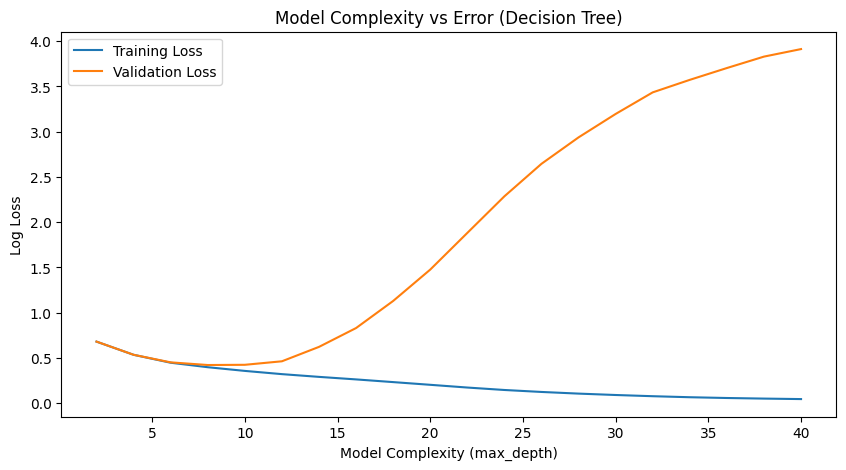

In [32]:
from sklearn.metrics import log_loss
from sklearn.model_selection import validation_curve
import numpy as np

# Compute log-loss for Decision Tree
train_loss = log_loss(y_train, dt_model_3.predict_proba(X_train))
test_loss  = log_loss(y_test,  dt_model_3.predict_proba(X_test))

print("------------------------")
print("Decision Tree Log Loss")
print("------------------------")
print("Training Loss:")
print(train_loss)
print("------------------------")
print("Testing Loss:")
print(test_loss)
print("------------------------")

# Gap analysis
acc_gap  = train_accuracy - test_accuracy
loss_gap = test_loss - train_loss

print("Accuracy Gap (Train - Test):")
print(acc_gap)
print("------------------------")
print("Loss Gap (Test - Train):")
print(loss_gap)
print("------------------------")


# ================================
# 1. FAST STRATIFIED SUBSAMPLING
# ================================
from sklearn.model_selection import train_test_split
import numpy as np

# Take only 5% of the data (tweak 0.05 → 0.02 or 0.01 if still slow)
sample_ratio = 0.25  
X_small, _, y_small, _ = train_test_split(
    X, y, 
    train_size=sample_ratio, 
    stratify=y,
    random_state=42
)

# Split the small subset into train/test
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_small, y_small,
    test_size=0.3,
    stratify=y_small,
    random_state=42
)

# ==================================
# 2. MODEL COMPLEXITY VS ERROR
# ==================================
depths = range(2, 41, 2)
train_losses_curve = []
test_losses_curve = []
train_acc_curve = []
test_acc_curve = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d)

    # Fit on *small* dataset
    model.fit(X_train_s, y_train_s)

    # Probabilities
    train_proba = model.predict_proba(X_train_s)
    test_proba  = model.predict_proba(X_test_s)

    # Loss
    train_losses_curve.append(log_loss(y_train_s, train_proba))
    test_losses_curve.append(log_loss(y_test_s, test_proba))

    # Accuracy
    y_train_pred = model.predict(X_train_s)
    y_test_pred  = model.predict(X_test_s)

    train_acc_curve.append(accuracy_score(y_train_s, y_train_pred))
    test_acc_curve.append(accuracy_score(y_test_s, y_test_pred))

# ================================
# 3. PLOT
# ================================
plt.figure(figsize=(10,5))
plt.plot(depths, train_losses_curve, label="Training Loss")
plt.plot(depths, test_losses_curve, label="Validation Loss")
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Log Loss")
plt.title("Model Complexity vs Error (Decision Tree)")
plt.legend()
plt.show()




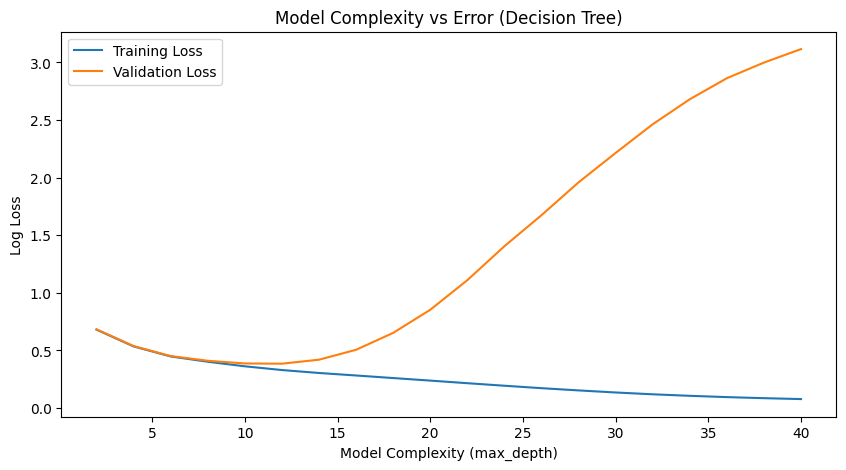

In [37]:
depths = range(2, 41, 2)
train_losses_curve = []
test_losses_curve = []
train_acc_curve = []
test_acc_curve = []


for d in depths:
    model = DecisionTreeClassifier(
        max_depth=d
    )

    model.fit(X_train, y_train)

    # Loss
    train_proba = model.predict_proba(X_train)
    test_proba  = model.predict_proba(X_test)
    train_losses_curve.append(log_loss(y_train, train_proba))
    test_losses_curve.append(log_loss(y_test, test_proba))

    # Accuracy
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    train_acc_curve.append(accuracy_score(y_train, y_train_pred))
    test_acc_curve.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10,5))
plt.plot(depths, train_losses_curve, label="Training Loss")
plt.plot(depths, test_losses_curve, label="Validation Loss")
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Log Loss")
plt.title("Model Complexity vs Error (Decision Tree)")
plt.legend()
plt.show()


### Evaluate Feature Importance (Decision Tree)

In [38]:
importance = dt_model_3.feature_importances_
features = X.columns

fi = pd.DataFrame({"feature": features, "importance": importance})
fi.sort_values(by="importance", ascending=False).head(20)

,feature,importance
9,Weapon_Present,0.321551
4,Vict Descent,0.197123
43,MO_0344,0.055075
86,MO_2038,0.048558
8,LON,0.037714
7,LAT,0.037556
2,Vict Age,0.031951
1,Part 1-2,0.025305
0,Rpt Dist No,0.024089
42,MO_0329,0.018477


### Perform a 5-Folds Cross Validation to verify the results obtained. (Decision Tree)

*This may take a while...

In [39]:
from sklearn.model_selection import cross_val_score, KFold

# Create the model (same as your main model)
cv_model = DecisionTreeClassifier()

# Define cross-validation strategy (5 folds, shuffle for randomness)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute CV scores (accuracy for each fold)
cv_scores = cross_val_score(cv_model, X, y, cv=kf, scoring="accuracy")

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-Validation Accuracy Scores: [0.8791188  0.87881471 0.87749629 0.87939183 0.87887442]
Mean CV Accuracy: 0.8787392122122591
Standard Deviation: 0.0006540385384110116


### Tree-Based: Random Forest (Processed)

*Yawn...

In [57]:
print("=== Random Forest Crime Classification (PROCESSED) ===")

# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new_1.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# Convert datetime columns to int64 timestamps
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view('int64')

# Convert list columns to strings so they can be factorized
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Fill any remaining NaN values before training
X = X.fillna(-1)

# Train-test split (stratify for class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train model (Correctly named rf_model_3)
rf_model_3 = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model_3.fit(X_train, y_train)

# Predict
y_pred = rf_model_3.predict(X_test)
y_pred_train = rf_model_3.predict(X_train)

# Evaluation
report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print(f"Overfit Gap:          {train_accuracy - test_accuracy:.4f}")
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

=== Random Forest Crime Classification (PROCESSED) ===
Training Set Accuracy: 0.9819074248073542
Testing Set Accuracy: 0.9109347325687069
Overfit Gap:          0.0710
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.994636  0.970032  0.982180  355910.000000
1              0.999920  0.999976  0.999948  163441.000000
2              0.997181  0.994108  0.995642   44125.000000
3              0.888652  0.980026  0.932105   86411.000000
4              0.999853  0.999485  0.999669   13602.000000
5              0.998435  0.998315  0.998375    8309.000000
6              0.999672  0.999409  0.999541   15240.000000
7              0.993096  0.997712  0.995398   13984.000000
8              0.998051  0.980843  0.989372     522.000000
9              1.000000  1.000000  1.000000    1949.0

A respectful increment.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Create the model (same as your main model)
cv_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Define cross-validation strategy (5 folds, shuffle for randomness)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute CV scores (accuracy for each fold)
cv_scores = cross_val_score(cv_model, X, y, cv=kf, scoring="accuracy")

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

### Evaluate Feature Importance (Random Forest)

In [54]:
# -------------------------------------------
# Feature Importance
# -------------------------------------------
importance = rf_model_3.feature_importances_
features = X.columns

fi = pd.DataFrame({"feature": features, "importance": importance})
fi.sort_values(by="importance", ascending=False).head(20)


,feature,importance
9,Weapon_Present,0.180594
4,Vict Descent,0.085786
3,Vict Sex,0.057991
69,MO_0344,0.056179
2,Vict Age,0.051690
20,MO_0416,0.042638
8,LON,0.041528
7,LAT,0.041235
1,Part 1-2,0.034546
68,MO_0913,0.033063


### Perform a ShuffleSplit Cross-Validation (Lower Memory Usage & Time) to verify the results obtained. (Random Forest)

#### Cross-Validation would take up to 50 minutes.

#### Attempt at your own Risk.

*ZZZzzz...

### Naive Bayes (Processed)

In [55]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new.copy()

X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# ---- FIX 1: Convert datetime columns to int64 ----
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# ---- FIX 2: Convert lists → strings to make them hashable ----
for col in X.columns:
	    if X[col].dtype == 'object':
	        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# ---- Factorize object columns ----
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Build a Gaussian Classifier
nb_model_3 = GaussianNB()
nb_model_3.fit(X_train, y_train)

# Predict
y_pred_train_1 = nb_model_3.predict(X_train)
y_pred_test_1 = nb_model_3.predict(X_test)

# Evaluation
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train_1, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test_1, output_dict=True)
).transpose()

print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")


C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_1496\924237266.py:9: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view("int64")
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Loca

------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.506096  1.000000  0.672063  356035.000000
1              0.000000  0.000000  0.000000  163391.000000
2              0.000000  0.000000  0.000000   44202.000000
3              0.000000  0.000000  0.000000   86340.000000
4              0.000000  0.000000  0.000000   13595.000000
5              0.000000  0.000000  0.000000    8282.000000
6              0.000000  0.000000  0.000000   15207.000000
7              0.000000  0.000000  0.000000   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.000000  0.000000  0.000000    1957.000000
accuracy       0.506096  0.506096  0.506096       0.506096
macro avg      0.050610  0.100000  0.067206  703493.000000
weighted avg   0.256133  0.506096  0.340129

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### WHY?

❗ “All predictions have gone to the majority class.”

Logistic Regression & Gaussian NB are linear / probabilistic models.
They take the path of least resistance:

→ Predict the largest class every time
→ Because it's the statistically safest choice

This is why ALL precision/recall/f1 become 0 for every class except class 0.

📌 Why Naive Bayes Fails Here

Gaussian NB assumes:
- Each feature is normally distributed
- Every feature is independent
- No complex interactions
- Features are meaningful numeric data

But our features include:
- Factorized categorical values (integer IDs → meaningless distances)
- Hundreds of unique categories
- Non-linear relationships

This violates every single NB assumption.

So NB collapses to predicting the majority class

✅ This proves the problem is truly multiclass & complex

When simple linear/probabilistic models collapse into predicting a single class, it strongly indicates:
- The dataset is not linearly separable
- The classes have non-linear interactions
- The problem is not binary-like
- Some classes are extremely underrepresented
- The feature–class relationships are too complex for basic models

So, linear models like Logistic Regession & Naive Bayes, are NOT sufficient enough to complete this task. Hence, we'll drop the Naive Bayes model altogether.

### XGBoost (Processed)

In [56]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# ---- FIX 1: Convert datetime columns to int64 ----
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# ---- FIX 2: Convert lists → strings to make them hashable ----
for col in X.columns:
	    if X[col].dtype == 'object':
	        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# ---- Factorize object columns ----
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train XGBoost model
xgb_model_2 = XGBClassifier()

xgb_model_2.fit(X_train, y_train)

# Predictions
y_pred_train = xgb_model_2.predict(X_train)
y_pred_test = xgb_model_2.predict(X_test)

# Evaluation reports
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_1496\3095293478.py:10: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view("int64")


Training Set Accuracy: 0.9225990876952578
Testing Set Accuracy: 0.9166661138714022
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.960558  0.936366  0.948308  356035.000000
1              0.944353  0.977575  0.960677  163391.000000
2              0.850091  0.679426  0.755237   44202.000000
3              0.820770  0.961443  0.885555   86340.000000
4              0.814075  0.803236  0.808619   13595.000000
5              0.848346  0.668679  0.747873    8282.000000
6              0.949148  0.948774  0.948961   15207.000000
7              0.760926  0.756670  0.758792   13944.000000
8              1.000000  0.174074  0.296530     540.000000
9              0.793244  0.695963  0.741426    1957.000000
accuracy       0.922599  0.922599  0.922599       0.922599
macro avg      0.87

### Evaluate Feature Importance (XGBoost)

In [35]:
# -------------------------------------------
# Feature Importance
# -------------------------------------------
importance = xgb_model_2.feature_importances_
features = X.columns

fi = pd.DataFrame({"feature": features, "importance": importance})
fi.sort_values(by="importance", ascending=False).head(20)


,feature,importance
16,Weapon_Present,0.168830
55,MO_2038,0.106948
7,Vict Sex,0.071647
8,Vict Descent,0.056065
93,MO_1906,0.053005
67,MO_0355,0.043746
34,MO_0344,0.035877
113,MO_0945,0.032207
88,MO_0334,0.027419
98,MO_0337,0.021917


### Perform a 5-Folds Cross Validation to verify the results obtained. (XGBoost)

*Sigh* 

DO NOT RUN, UNLESS, you prefer to wait for 50 minutes.

In [46]:
from sklearn.model_selection import cross_val_score, KFold

# Create the model (same as your main model)
cv_model = XGBClassifier()

# Define cross-validation strategy (5 folds, shuffle for randomness)
xg = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute CV scores (accuracy for each fold)
cv_scores = cross_val_score(cv_model, X, y, cv=xg, scoring="accuracy")

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-Validation Accuracy Scores: [0.91694486 0.9178151  0.91721808 0.91810864 0.91809869]
Mean CV Accuracy: 0.9176370740556022
Standard Deviation: 0.0004736808837070003


## Category: Deep Learning Models

### Neural Networks: CNN (Proessed)

In [36]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# ---- FIX 1: Convert datetime columns to int64 ----
for col in X.select_dtypes(include=["datetime64[ns]", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

# ---- FIX 2: Convert lists → strings to make them hashable ----
for col in X.columns:
	    if X[col].dtype == 'object':
	        X[col] = X[col].apply(lambda x: str(x) if isinstance(x, list) else x)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Handle missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ====== RESHAPE FOR CNN (Conv1D needs shape: samples, timesteps, features) ======
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ====== BUILD CNN MODEL ======
cnn_model_2 = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

cnn_model_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ====== TRAIN ======
history = cnn_model_2.fit(
    X_train_cnn, y_train_cat,
    epochs=10,              # Use epoch size = 10, since the datset is fairly large. Fewer epochs means less strain and timne
    batch_size=32,          #Default values is 32.
    validation_split=0.2,   #Keras default is 0.0
    verbose=1               #Keras default is 1
)

# ====== PREDICT ======
y_pred_train = cnn_model_2.predict(X_train_cnn).argmax(axis=1)
y_pred_test = cnn_model_2.predict(X_test_cnn).argmax(axis=1)

# ====== EVALUATION ======
report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred_test, output_dict=True)
).transpose()

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

C:\Users\wongj_gwtzhu8\AppData\Local\Temp\ipykernel_19936\2039213715.py:10: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X[col] = X[col].view("int64")
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 156s 9ms/step - accuracy: 0.8999 - loss: 0.3159 - val_accuracy: 0.9095 - val_loss: 0.2750
Epoch 2/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 153s 9ms/step - accuracy: 0.9083 - loss: 0.2812 - val_accuracy: 0.9122 - val_loss: 0.2662
Epoch 3/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 159s 9ms/step - accuracy: 0.9103 - loss: 0.2735 - val_accuracy: 0.9130 - val_loss: 0.2615
Epoch 4/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 137s 8ms/step - accuracy: 0.9112 - loss: 0.2694 - val_accuracy: 0.9128 - val_loss: 0.2647
Epoch 5/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 148s 8ms/step - accuracy: 0.9120 - loss: 0.2668 - val_accuracy: 0.9138 - val_loss: 0.2605
Epoch 6/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 145s 8ms/step - accuracy: 0.9124 - loss: 0.2648 - val_accuracy: 0.9145 - val_loss: 0.2578
Epoch 7/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 150s 9ms/step - accuracy: 0.9130 - loss: 0.2633 - val_accuracy: 0.9140 - val_loss: 0.2623
Epoch 8/10
17588/17588 ━━━━━━━━━━━━━━━━━━━━ 143s 8ms/step - ac

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

Training Set Accuracy: 0.9160133789533087
Testing Set Accuracy: 0.9126495034792934
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.953984  0.938065  0.945957  356035.000000
1              0.942015  0.972018  0.956781  163391.000000
2              0.827993  0.651238  0.729055   44202.000000
3              0.820424  0.956382  0.883201   86340.000000
4              0.771056  0.791247  0.781021   13595.000000
5              0.822644  0.580778  0.680869    8282.000000
6              0.936715  0.916880  0.926691   15207.000000
7              0.739707  0.691910  0.715011   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.653846  0.555953  0.600939    1957.000000
accuracy       0.916013  0.916013  0.916013       0.916013
macro avg      0.74

21985/21985 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step
9422/9422 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step
------------------------
Training Loss
0.25288165838259297
------------------------
Testing Loss:
0.2657686539181859
------------------------
:)
------------------------
Accuracy Gap:
0.0033638754740152876
------------------------
Loss Gap:
0.012886995535592916
------------------------


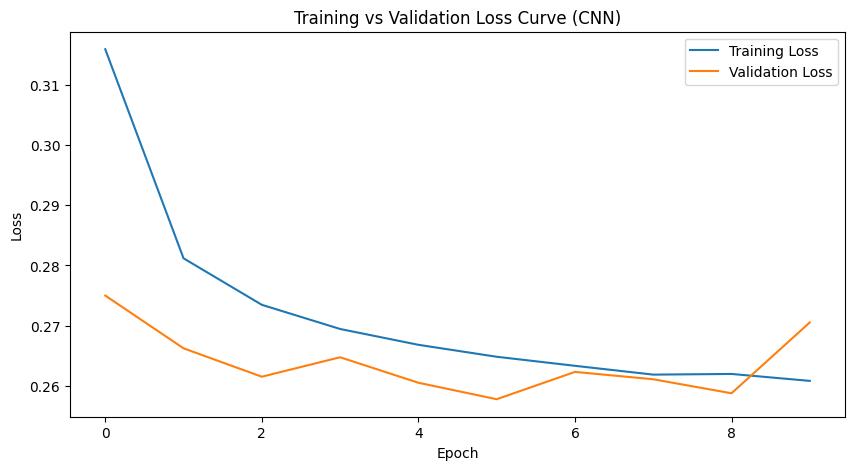

In [37]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# ====== COMPUTE PROBABILITIES ======
train_proba = cnn_model_2.predict(X_train_cnn)
test_proba  = cnn_model_2.predict(X_test_cnn)

# ====== COMPUTE LOG LOSS ======
train_loss = log_loss(y_train, train_proba)
test_loss  = log_loss(y_test,  test_proba)

print("------------------------")
print("Training Loss")
print(train_loss)
print("------------------------")
print("Testing Loss:")
print(test_loss)
print("------------------------")
print(":)")
acc_gap  = train_accuracy - test_accuracy
loss_gap = test_loss - train_loss
print("------------------------")
print("Accuracy Gap:")
print(acc_gap)
print("------------------------")
print("Loss Gap:")
print(loss_gap)
print("------------------------")

# ====== PLOT TRAINING vs VALIDATION LOSS FROM HISTORY ======
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss Curve (CNN)")
plt.legend()
plt.show()


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential m

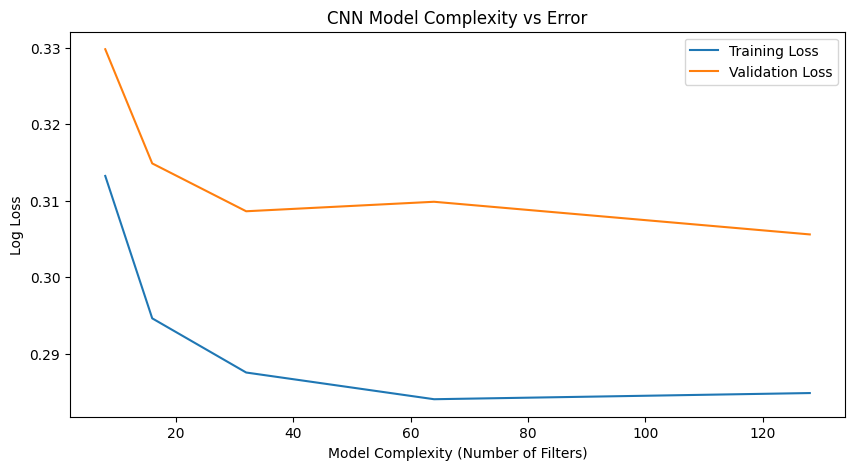

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# ======================================================
# 1. TAKE A SMALL SUBSET TO AVOID HOURS OF TRAINING
# ======================================================
subset = 50000   # Use 50k rows for speed (change if needed)

X_train_sub = X_train_cnn[:subset]
y_train_sub = y_train[:subset]
y_train_sub_cat = y_train_cat[:subset]

X_val_sub = X_test_cnn[:20000]
y_val_sub = y_test[:20000]
y_val_sub_cat = y_test_cat[:20000]

# ======================================================
# 2. DEFINE COMPLEXITY LEVELS (NUMBER OF FILTERS)
# ======================================================
complexities = [8, 16, 32, 64, 128]

train_losses = []
test_losses = []
train_accs = []
test_accs = []

# ======================================================
# 3. LOOP THROUGH MODEL COMPLEXITIES
# ======================================================
for filters in complexities:

    model = Sequential([
        Conv1D(filters, kernel_size=3, activation='relu',
               input_shape=(X_train_sub.shape[1], 1)),
        MaxPooling1D(pool_size=2),

        Conv1D(filters*2, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),

        Flatten(),

        Dense(64, activation='relu'),
        Dropout(0.3),

        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    # short training for speed
    model.fit(
        X_train_sub, y_train_sub_cat,
        epochs=3,          # small number for speed
        batch_size=64,
        verbose=0
    )

    # Predictions
    train_proba = model.predict(X_train_sub, verbose=0)
    test_proba  = model.predict(X_val_sub,   verbose=0)

    y_train_pred = np.argmax(train_proba, axis=1)
    y_test_pred  = np.argmax(test_proba, axis=1)

    # Metrics
    train_losses.append(log_loss(y_train_sub, train_proba))
    test_losses.append(log_loss(y_val_sub,  test_proba))

    train_accs.append(accuracy_score(y_train_sub, y_train_pred))
    test_accs.append(accuracy_score(y_val_sub,  y_test_pred))


# ======================================================
# 4. PLOT COMPLEXITY vs ERROR
# ======================================================
plt.figure(figsize=(10,5))
plt.plot(complexities, train_losses, label="Training Loss")
plt.plot(complexities, test_losses, label="Validation Loss")
plt.xlabel("Model Complexity (Number of Filters)")
plt.ylabel("Log Loss")
plt.title("CNN Model Complexity vs Error")
plt.legend()
plt.show()


## Part B - Parameters

### Now, let's implement Hyperparameter Tuning:

This will take a while as well.

### Decision Tree (Processed & Parameters)

In [47]:
# Remove Crm Cd Desc to avoid leakage
df_model_2 = df_new_1.copy()

# Prepare training data
X = df_model_2.drop(columns=["Crime_Class"])
y, _ = pd.factorize(df_model_2["Crime_Class"])

# Convert datetime columns to int64 timestamps
for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view('int64')

# Convert list columns to strings so they can be factorized
for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

# Factorize object columns
X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ============================================================
# 🔥 FAST HYPERPARAMETER TUNING — SUCCESSIVE HALVING
# ============================================================

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

halving_search = HalvingGridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    factor=3,      # aggressively eliminates bad configs
    resource="n_samples",
    max_resources="auto",
    n_jobs=-1,
    verbose=1
)

halving_search.fit(X_train, y_train)

print("Best Parameters:", halving_search.best_params_)

# Best model
dt_model_4 = halving_search.best_estimator_

# ============================================================
# Prediction and Evaluation
# ============================================================

# Predict
y_pred = dt_model_4.predict(X_test)
y_pred_train = dt_model_4.predict(X_train)

# Eval reports
report_test = pd.DataFrame.from_dict(
    classification_report(y_test, y_pred, output_dict=True)
).transpose()

report_train = pd.DataFrame.from_dict(
    classification_report(y_train, y_pred_train, output_dict=True)
).transpose()

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Set Accuracy:", train_accuracy)
print("Testing Set Accuracy:", test_accuracy)
print("------------------------------------------------------------------------------------")
print("Training Set Report")
print("------------------------------------------------------------------------------------")
print(report_train)
print("------------------------------------------------------------------------------------")
print("Testing Set Report")
print("------------------------------------------------------------------------------------")
print(report_test)
print("------------------------------------------------------------------------------------")

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 26055
max_resources_: 703493
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 54
n_resources: 26055
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 1
n_candidates: 18
n_resources: 78165
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 2
n_candidates: 6
n_resources: 234495
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 3
n_candidates: 2
n_resources: 703485
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

Training Set Accuracy: 0.8912043190195211
Testing Set Accuracy: 0.8901253076305647
------------------------------------------------------------------------------------
Training Set Report
------------------------------------------------------------------------------------
              precision    recall  f1-score        support
0              0.929658  0.927457  0.928556  356035.000000
1              0.916610  0.959116  0.937382  163391.000000
2              0.679806  0.581331  0.626724   44202.000000
3              0.821368  0.949977  0.881004   86340.000000
4              0.671077  0.761015  0.713222   13595.000000
5              0.936715  0.450374  0.608284    8282.000000
6              0.977356  0.877030  0.924479   15207.000000
7              0.735199  0.309022  0.435143   13944.000000
8              0.000000  0.000000  0.000000     540.000000
9              0.778934  0.306081  0.439472    1957.000000
accuracy       0.891204  0.891204  0.891204       0.891204
macro avg      0.74

c:\Users\wongj_gwtzhu8\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [48]:
from sklearn.metrics import log_loss

train_loss = log_loss(y_train, dt_model_4.predict_proba(X_train))
test_loss  = log_loss(y_test,  dt_model_4.predict_proba(X_test))
print("------------------------")
print("Training Loss")
print(train_loss)
print("------------------------")
print("Testing Error:")
print(test_loss)
print("------------------------")
print(":)")
acc_gap  = train_accuracy - test_accuracy
loss_gap = test_loss - train_loss
print("------------------------")
print("Accuracy Gap:")
print(acc_gap)
print("------------------------")
print("Loss Gap:")
print(loss_gap)
print("------------------------")


------------------------
Training Loss
0.3343433551990626
------------------------
Testing Error:
0.3655590139101725
------------------------
:)
------------------------
Accuracy Gap:
0.0010790113889563857
------------------------
Loss Gap:
0.031215658711109873
------------------------


We report these gaps.

Interpretation:

Gap	Meaning
- 0–5%	Very good generalization
- 5–15%	Acceptable
- 15%	Overfitting

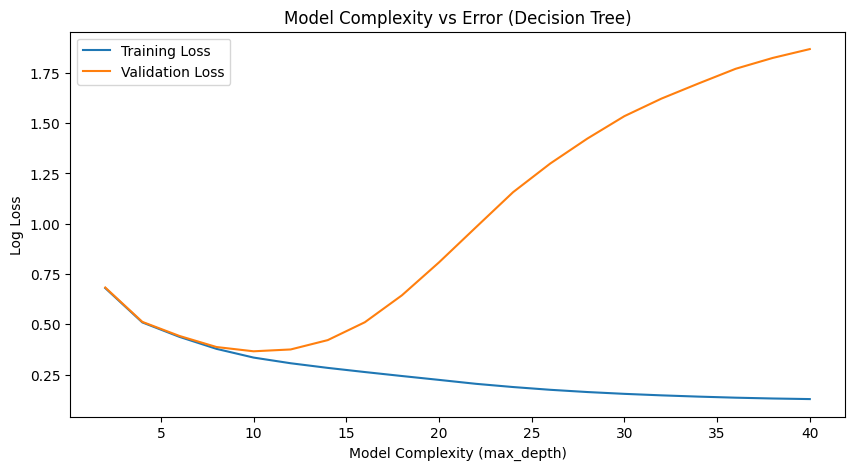

In [49]:
depths = range(2, 41, 2)
train_losses_curve = []
test_losses_curve = []
train_acc_curve = []
test_acc_curve = []

# Use best hyperparameters, vary only depth
best_params = halving_search.best_params_

for d in depths:
    loss_model = DecisionTreeClassifier(
        criterion=best_params['criterion'],
        min_samples_leaf=best_params['min_samples_leaf'],
        min_samples_split=best_params['min_samples_split'],
        max_depth=d
    )

    loss_model.fit(X_train, y_train)

    # Loss
    train_proba = loss_model.predict_proba(X_train)
    test_proba  = loss_model.predict_proba(X_test)
    train_losses_curve.append(log_loss(y_train, train_proba))
    test_losses_curve.append(log_loss(y_test, test_proba))

    # Accuracy
    y_train_pred = loss_model.predict(X_train)
    y_test_pred  = loss_model.predict(X_test)
    train_acc_curve.append(accuracy_score(y_train, y_train_pred))
    test_acc_curve.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10,5))
plt.plot(depths, train_losses_curve, label="Training Loss")
plt.plot(depths, test_losses_curve, label="Validation Loss")
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Log Loss")
plt.title("Model Complexity vs Error (Decision Tree)")
plt.legend()
plt.show()


### XGBoost (Processed & Parameters)

In [50]:
print("=== FAST & MEMORY-EFFICIENT XGBOOST TRAINING ===")

import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform

# ============================================================
# PREPROCESSING (same as before)
# ============================================================

df_model_2 = df_new_1.copy()

X = df_model_2.drop(columns=["Crime_Class"])
# Keep y as a pandas Series instead of numpy array
y = pd.Series(pd.factorize(df_model_2["Crime_Class"])[0])


for col in X.select_dtypes(include=["datetime", "datetimetz"]).columns:
    X[col] = X[col].view("int64")

for col in X.columns:
    if X[col].apply(lambda x: isinstance(x, list)).any():
        X[col] = X[col].astype(str)

X = X.apply(lambda col: pd.factorize(col)[0] if col.dtype == "object" else col)
X = X.astype("float32")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ============================================================
# TINY SUBSAMPLE FOR FAST TUNING
# ============================================================

tune_size = 10000
X_tune = X_train.sample(tune_size, random_state=42)
y_tune = y_train[X_tune.index]

print(f"Tuning using {len(X_tune):,} rows")

# ============================================================
# FAST XGBOOST RANDOMIZED SEARCH
# ============================================================

xgb_base = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "max_depth": randint(4, 10),
    "learning_rate": uniform(0.03, 0.2),
    "min_child_weight": randint(1, 6),
    "subsample": uniform(0.5, 0.5),
    "colsample_bytree": uniform(0.5, 0.5),
    "n_estimators": randint(150, 400)
}

search = RandomizedSearchCV(
    xgb_base,
    param_distributions=param_dist,
    n_iter=15,        # FAST
    cv=2,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_tune, y_tune)

print("\nBest Params:", search.best_params_)

# ============================================================
# TRAIN FINAL MODEL ON FULL DATASET
# ============================================================

xgb_final = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1,
    **search.best_params_
)

xgb_final.fit(X_train, y_train)

# ============================================================
# EVALUATION
# ============================================================

y_pred_train = xgb_final.predict(X_train)
y_pred_test = xgb_final.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

print("\nTRAIN REPORT")
print(classification_report(y_train, y_pred_train))

print("\nTEST REPORT")
print(classification_report(y_test, y_pred_test))


=== FAST & MEMORY-EFFICIENT XGBOOST TRAINING ===
Tuning using 10,000 rows
Fitting 2 folds for each of 15 candidates, totalling 30 fits

Best Params: {'colsample_bytree': np.float64(0.7713480415791243), 'learning_rate': np.float64(0.05818484499495253), 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 238, 'subsample': np.float64(0.9934434683002586)}
Training Accuracy: 0.9190510779780324
Testing Accuracy: 0.913664435584979

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.95      0.94      0.95    356035
           1       0.94      0.98      0.96    163391
           2       0.86      0.65      0.74     44202
           3       0.82      0.96      0.88     86340
           4       0.81      0.80      0.80     13595
           5       0.88      0.61      0.72      8282
           6       0.95      0.94      0.94     15207
           7       0.74      0.73      0.73     13944
           8       0.98      0.09      0.16       540
           9  